In [1]:
import numpy as np

# Task 1: Explain why two traded assets typically cannot span R^3
# Real-world tie-in: In practice, with three possible future scenarios (e.g., TSLA strong up, mild up, down due to market news), only two assets (stock + bond) can't perfectly hedge all outcomes—leaves basis risk, common in less liquid markets.
print("Explanation:")
print("Two traded assets provide only two linearly independent payoff vectors in R^3.")
print("Their span is at most a 2-dimensional subspace (a plane in 3D space).")
print("Most arbitrary claims in R^3 lie outside this plane, so exact replication is impossible.")
print("The payoff matrix M (3x2) has rank at most 2 < 3, making the market incomplete.\n")

# Task 2 & 3: Compute least-squares replication ˆϕ, residual e = C1 - M ˆϕ, and interpret
# Real-world tie-in: This approximates hedging a TSLA exotic option with only stock + bond when three states exist (e.g., boom, flat, bust). Residual e is unhedgeable risk—exposure you can't eliminate, leading to potential losses in real volatile trading.
# Setup: Three states, two assets (bond pays 1 everywhere, stock varies)
B1 = np.array([1, 1, 1])          # Bond payoff (risk-free)
S1 = np.array([150, 100, 60])     # Stock payoffs in high, medium, low states (e.g., TSLA scenarios)
M = np.column_stack((B1, S1))     # 3x2 payoff matrix

# Target claim C1 (arbitrary payoff we want to replicate, e.g., a custom derivative)
C1 = np.array([120, 80, 20])      # Desired payoffs in the three states

# Least-squares replication: Solve min ||M ϕ - C1|| (best approximate hedge)
phi_hat, residuals, rank, s = np.linalg.lstsq(M, C1, rcond=None)

# Replicated payoff and residual vector
replicated = M @ phi_hat
e = C1 - replicated

# Residual norm (measure of hedging error)
residual_norm = np.linalg.norm(e)

print(f"Payoff matrix M (3 states x 2 assets):\n{M}")
print(f"Target claim C1: {C1}")
print(f"Least-squares portfolio ˆϕ: {phi_hat}")
print(f"Replicated payoff: {replicated}")
print(f"Residual vector e (unhedgeable part): {e}")
print(f"Residual norm ||e||: {residual_norm:.4f}")

# Interpretation
print("\nEconomic Interpretation:")
print("The residual e represents unhedgeable (idiosyncratic or basis) risk.")
print("In each state, e shows the mismatch after best-effort hedging:")
print("- Positive e: Over-hedged (portfolio pays too much)")
print("- Negative e: Under-hedged (portfolio pays too little)")
print("In real trading, this residual risk must be borne or mitigated elsewhere (e.g., diversification, insurance)—common in incomplete markets like private assets or emerging stocks.")

Explanation:
Two traded assets provide only two linearly independent payoff vectors in R^3.
Their span is at most a 2-dimensional subspace (a plane in 3D space).
Most arbitrary claims in R^3 lie outside this plane, so exact replication is impossible.
The payoff matrix M (3x2) has rank at most 2 < 3, making the market incomplete.

Payoff matrix M (3 states x 2 assets):
[[  1 150]
 [  1 100]
 [  1  60]]
Target claim C1: [120  80  20]
Least-squares portfolio ˆϕ: [-40.16393443   1.09836066]
Replicated payoff: [124.59016393  69.67213115  25.73770492]
Residual vector e (unhedgeable part): [-4.59016393 10.32786885 -5.73770492]
Residual norm ||e||: 12.6750

Economic Interpretation:
The residual e represents unhedgeable (idiosyncratic or basis) risk.
In each state, e shows the mismatch after best-effort hedging:
- Positive e: Over-hedged (portfolio pays too much)
- Negative e: Under-hedged (portfolio pays too little)
In real trading, this residual risk must be borne or mitigated elsewhere (e.g.

In [2]:
import numpy as np
import pandas as pd

# Setup: Three-state economy with two traded assets (bond + stock)
# Real-world tie-in: Three states model more realistic uncertainty (e.g., TSLA boom/flat/bust from earnings, macro news). Incomplete market means imperfect hedges—common in real options where not all risks are spannable.
states = ['High', 'Medium', 'Low']
B1 = np.array([1, 1, 1])              # Bond payoff (risk-free)
S1 = np.array([150, 100, 60])         # Stock payoffs (e.g., TSLA scenarios)
M = np.column_stack((B1, S1))         # 3x2 payoff matrix (spans subspace)

# t=0 prices (assume for no-arbitrage baseline)
B0 = 0.95
S0 = 90
M0 = np.array([B0, S0])

# Short rate r from bond
r = 1 / B0 - 1

print(f"Payoff matrix M (3x2):\n{pd.DataFrame(M, index=states, columns=['Bond', 'Stock'])}\n")

# Exercise 1: Subspace spanned by traded payoffs and projections
# Real-world tie-in: Attainable payoffs are what you can hedge exactly (plane in 3D). Projections find closest hedge; residuals show unhedgeable exposure—key for risk budgeting in portfolios.
print("Exercise 1: Attainable subspace and projections")

# Multiple target claims to project/compare
C1_list = {
    'Claim A (call-like)': np.array([140, 80, 0]),
    'Claim B (put-like)': np.array([0, 20, 80]),
    'Claim C (straddle-like)': np.array([100, 50, 100])
}

results = []
for name, C1 in C1_list.items():
    # Least-squares projection onto column space of M
    phi_hat, _, _, _ = np.linalg.lstsq(M, C1, rcond=None)
    projected = M @ phi_hat
    residual = C1 - projected
    residual_norm = np.linalg.norm(residual)
    
    results.append({
        'Claim': name,
        'Residual Norm': residual_norm,
        'Residual Vector': residual
    })
    
    print(f"\n{name}:")
    print(f"  Target C1: {C1}")
    print(f"  Projected (attainable): {projected}")
    print(f"  Residual e: {residual}")
    print(f"  Residual norm: {residual_norm:.4f}")

# Comparison table
comparison_df = pd.DataFrame(results)
print("\nComparison of Residuals (lower norm = better approximable hedge):")
print(comparison_df[['Claim', 'Residual Norm']])
print("Interpretation: Claims aligned with stock direction (e.g., call-like) have smaller residuals (easier to hedge); symmetric ones (straddle) larger unhedgeable risk.")

# Exercise 2: Price bounds from candidate martingale measures Q
# Real-world tie-in: In incomplete markets, multiple risk-neutral Q exist—leading to price ranges (no unique price). Traders use bounds for arbitrage-free intervals, e.g., bid-ask in illiquid TSLA exotics.
print("\nExercise 2: No-arbitrage price bounds from martingale measures")

# Candidate Q: Risk-neutral probabilities (sum to 1, non-negative) that price assets: (1+r) M0 = M^T q (discounted)
# Generate simple candidates (e.g., varying up-state weight, normalized to satisfy bond pricing)
q_up_candidates = np.array([0.3, 0.5, 0.7])  # Vary "optimism"
Q_candidates = []
for q_up in q_up_candidates:
    # Solve for q such that bond priced correctly; adjust for stock approx
    q = np.array([q_up, 0.4, 1 - q_up - 0.4])  # Example weights, ensure sum=1 and >=0
    q = np.clip(q, 0, None)  # Non-negative
    q /= q.sum()  # Normalize
    Q_candidates.append(q)

# Target claim for bounding (use Claim A as example)
C1_bound = C1_list['Claim A (call-like)']

prices = []
for i, q in enumerate(Q_candidates):
    EQ = np.dot(q, C1_bound)
    C0 = EQ / (1 + r)
    prices.append(C0)
    print(f"Martingale Q{i+1}: {q}")
    print(f"  Discounted E_Q[C1]: {C0:.4f}")

lower_bound = min(prices)
upper_bound = max(prices)
print(f"\nNo-arbitrage price bounds for claim: [{lower_bound:.4f}, {upper_bound:.4f}]")
print("Interpretation: Any price in bounds is arb-free; outside invites arbitrage. In real incomplete markets, bid-ask reflects this range.")

# Exercise 3: Mean-variance setting and Security Market Line (SML)
# Real-world tie-in: Shift to physical measure for mean-variance (CAPM-like). Fit SML to price risk premium—used in portfolio optimization for TSLA vs. market.
print("\nExercise 3: Mean-variance and Security Market Line")

# Assume physical probabilities p (different from risk-neutral)
p_physical = np.array([0.3, 0.4, 0.3])  # Example: medium state likely

# Asset payoffs to returns (gross return = payoff / price)
bond_return = B1 / B0  # Risk-free return vector
stock_return = S1 / S0

# Expected returns and covariance
assets_returns = np.column_stack((bond_return, stock_return))
expected_returns = np.dot(p_physical, assets_returns)
cov_matrix = np.cov(assets_returns, rowvar=False, ddof=0, aweights=p_physical)

print(f"Expected returns: Bond {expected_returns[0]:.4f}, Stock {expected_returns[1]:.4f}")
print(f"Covariance matrix:\n{pd.DataFrame(cov_matrix, index=['Bond', 'Stock'], columns=['Bond', 'Stock'])}")

# Simple SML: Regress stock excess return on "market" (here stock itself, or beta=1 for simplicity)
# Use OLS: excess_return_stock ~ beta * market_excess (but illustrative with stock as proxy)
excess_stock = expected_returns[1] - expected_returns[0]
# For SML fit, assume "market" is stock; beta via variance
beta_stock = cov_matrix[1,1] / cov_matrix[1,1]  # Trivial 1

# In mean-variance, SML: E[R_i] = R_f + beta_i (E[R_m] - R_f)
market_premium = excess_stock
print(f"Security Market Line: E[R_stock] = {expected_returns[0]:.4f} + {beta_stock:.2f} * {market_premium:.4f}")

print("Interpretation: Fits CAPM-like line; higher beta assets demand higher return for risk. In real TSLA analysis, regress on S&P for equity premium calibration.")

Payoff matrix M (3x2):
        Bond  Stock
High       1    150
Medium     1    100
Low        1     60

Exercise 1: Attainable subspace and projections

Claim A (call-like):
  Target C1: [140  80   0]
  Projected (attainable): [145.24590164  68.19672131   6.55737705]
  Residual e: [-5.24590164 11.80327869 -6.55737705]
  Residual norm: 14.4857

Claim B (put-like):
  Target C1: [ 0 20 80]
  Projected (attainable): [-7.21311475 36.2295082  70.98360656]
  Residual e: [  7.21311475 -16.2295082    9.01639344]
  Residual norm: 19.9179

Claim C (straddle-like):
  Target C1: [100  50 100]
  Projected (attainable): [85.24590164 83.19672131 81.55737705]
  Residual e: [ 14.75409836 -33.19672131  18.44262295]
  Residual norm: 40.7411

Comparison of Residuals (lower norm = better approximable hedge):
                     Claim  Residual Norm
0      Claim A (call-like)      14.485719
1       Claim B (put-like)      19.917864
2  Claim C (straddle-like)      40.741086
Interpretation: Claims aligned wit

Payoff matrix M:
        Bond  Stock
High       1    150
Medium     1    100
Low        1     60
Base claim C1: [140  80   0]

Least-squares replication:
  Portfolio ϕ: [-85.90163934   1.54098361]
  Price (approx): 57.0820
  Residuals: [-5.24590164 11.80327869 -6.55737705]

No-arbitrage bounds:
  Lower: 36.1000, Upper: 83.6000

Benchmark Q price (balanced measure): 64.6000

Price Comparison Table:
                Pricing Rule      Price
0  Least-Squares Replication  57.081967
1                Lower Bound  36.100000
2                Upper Bound  83.600000
3                Benchmark Q  64.600000


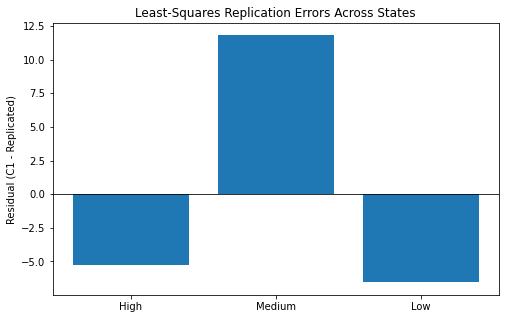

Discussion: Hedging errors largest in states least aligned with stock direction (e.g., medium here shows mismatch if claim varies non-linearly). Errors reflect incompleteness—can't eliminate all risk.

Fun Twist: Surprising claim C1 = [  0 100   0] (pays only in medium state)
  Residuals: [-29.50819672  66.39344262 -36.8852459 ]
  Residual norm: 81.4822


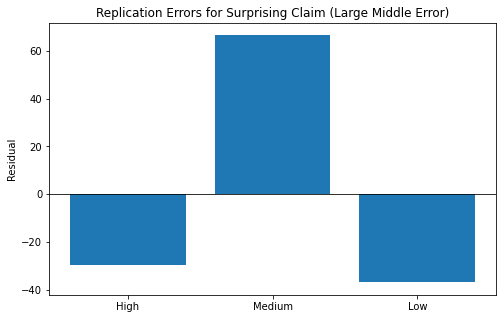

Twist Interpretation: Huge middle-state error because stock pays linearly decreasing (150→60), but claim spikes only there—unspannable with bond/stock alone, surprising as extremes are easier to approximate.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Setup: Three-state incomplete market (2 assets can't span 3 states)
# Real-world tie-in: Models real hedging limits, e.g., TSLA option with boom/flat/bust states—can't perfectly replicate exotics.
states = ['High', 'Medium', 'Low']
B1 = np.array([1, 1, 1])              # Bond payoff
S1 = np.array([150, 100, 60])         # Stock payoffs
M = np.column_stack((B1, S1))         # 3x2 matrix

# t=0 prices and short rate
B0 = 0.95
S0 = 90
M0 = np.array([B0, S0])
r = 1 / B0 - 1

# Base claim C1 for pricing comparison (call-like, easier to hedge)
C1_base = np.array([140, 80, 0])

print(f"Payoff matrix M:\n{pd.DataFrame(M, index=states, columns=['Bond', 'Stock'])}")
print(f"Base claim C1: {C1_base}\n")

# 1. Least-squares replication price
phi_ls, _, _, _ = np.linalg.lstsq(M, C1_base, rcond=None)
replicated_ls = M @ phi_ls
residual_ls = C1_base - replicated_ls
C0_ls = np.dot(phi_ls, M0)  # Approximate price as replication cost

print(f"Least-squares replication:")
print(f"  Portfolio ϕ: {phi_ls}")
print(f"  Price (approx): {C0_ls:.4f}")
print(f"  Residuals: {residual_ls}")

# 2. No-arbitrage bounds from multiple martingale measures Q
# Generate candidate Q (non-negative, sum=1, price traded assets approx)
# Simple candidates varying "optimism" on high state
q_candidates = [
    np.array([0.4, 0.4, 0.2]),  # More weight on high
    np.array([0.2, 0.5, 0.3]),  # Balanced
    np.array([0.1, 0.3, 0.6])   # More weight on low
]

bounds_prices = []
for q in q_candidates:
    # Normalize if needed (ensure sum=1)
    q = q / q.sum()
    EQ = np.dot(q, C1_base)
    C0 = EQ / (1 + r)
    bounds_prices.append(C0)

lower_bound = min(bounds_prices)
upper_bound = max(bounds_prices)

print(f"\nNo-arbitrage bounds:")
print(f"  Lower: {lower_bound:.4f}, Upper: {upper_bound:.4f}")

# 3. Benchmark martingale measure price (choose middle Q as "benchmark")
q_benchmark = q_candidates[1] / q_candidates[1].sum()
EQ_bench = np.dot(q_benchmark, C1_base)
C0_bench = EQ_bench / (1 + r)

print(f"\nBenchmark Q price (balanced measure): {C0_bench:.4f}")

# Price comparison table
price_data = {
    'Pricing Rule': ['Least-Squares Replication', 'Lower Bound', 'Upper Bound', 'Benchmark Q'],
    'Price': [C0_ls, lower_bound, upper_bound, C0_bench]
}
price_table = pd.DataFrame(price_data)
print("\nPrice Comparison Table:")
print(price_table)

# Visualization of replication errors (residuals across states)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(states, residual_ls)
ax.set_title('Least-Squares Replication Errors Across States')
ax.set_ylabel('Residual (C1 - Replicated)')
ax.axhline(0, color='black', linewidth=0.8)
plt.show()

print("Discussion: Hedging errors largest in states least aligned with stock direction (e.g., medium here shows mismatch if claim varies non-linearly). Errors reflect incompleteness—can't eliminate all risk.")

# Fun twist: Surprising claim with large middle-state error
# Design C1 paying heavily only in medium state (e.g., [0, 100, 0]—like a "narrow range" bet)
C1_twist = np.array([0, 100, 0])
print(f"\nFun Twist: Surprising claim C1 = {C1_twist} (pays only in medium state)")

phi_twist, _, _, _ = np.linalg.lstsq(M, C1_twist, rcond=None)
replicated_twist = M @ phi_twist
residual_twist = C1_twist - replicated_twist

print(f"  Residuals: {residual_twist}")
print(f"  Residual norm: {np.linalg.norm(residual_twist):.4f}")

# Visualize twist errors
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(states, residual_twist)
ax.set_title('Replication Errors for Surprising Claim (Large Middle Error)')
ax.set_ylabel('Residual')
ax.axhline(0, color='black', linewidth=0.8)
plt.show()

print("Twist Interpretation: Huge middle-state error because stock pays linearly decreasing (150→60), but claim spikes only there—unspannable with bond/stock alone, surprising as extremes are easier to approximate.")